In [63]:
from sklearn.datasets import make_classification
import numpy as np
X,Y = make_classification(n_samples=100,n_features=2, n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=30)

In [64]:
import matplotlib .pyplot as plt

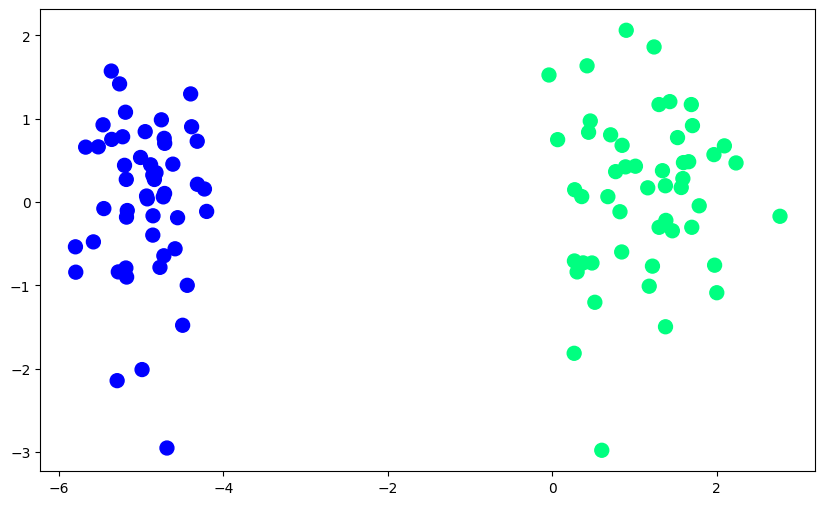

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)

In [66]:
X

array([[ 0.82321545, -0.11697552],
       [ 0.37514771, -0.73115232],
       [ 0.26947761, -0.7081059 ],
       [-4.98744874, -2.01199214],
       [ 0.4231285 ,  1.63493163],
       [-4.2289949 ,  0.15599044],
       [-5.18865382,  1.07782053],
       [ 0.7096287 ,  0.80626713],
       [ 0.06531501,  0.74859527],
       [-5.3563263 ,  0.75152794],
       [-5.17487315, -0.90114581],
       [-5.17644221, -0.1815243 ],
       [ 0.60202649, -2.98092432],
       [ 1.42960231,  1.20500136],
       [-5.22359581,  0.78302407],
       [ 1.01127528,  0.42968688],
       [ 0.48288133, -0.73229726],
       [-5.27614308, -0.83930476],
       [ 0.44163889,  0.83727062],
       [-5.167179  , -0.10255323],
       [-5.67316396,  0.65867001],
       [-5.4617787 ,  0.92649819],
       [-4.71348919,  0.10216193],
       [ 2.2344006 ,  0.46886454],
       [-4.61308761,  0.45432938],
       [ 1.2379403 ,  1.8613386 ],
       [-5.18419324, -0.79255991],
       [-4.43807529, -1.0004391 ],
       [-5.79725951,

In [67]:
np.insert(X,0,1,axis=1)

array([[ 1.        ,  0.82321545, -0.11697552],
       [ 1.        ,  0.37514771, -0.73115232],
       [ 1.        ,  0.26947761, -0.7081059 ],
       [ 1.        , -4.98744874, -2.01199214],
       [ 1.        ,  0.4231285 ,  1.63493163],
       [ 1.        , -4.2289949 ,  0.15599044],
       [ 1.        , -5.18865382,  1.07782053],
       [ 1.        ,  0.7096287 ,  0.80626713],
       [ 1.        ,  0.06531501,  0.74859527],
       [ 1.        , -5.3563263 ,  0.75152794],
       [ 1.        , -5.17487315, -0.90114581],
       [ 1.        , -5.17644221, -0.1815243 ],
       [ 1.        ,  0.60202649, -2.98092432],
       [ 1.        ,  1.42960231,  1.20500136],
       [ 1.        , -5.22359581,  0.78302407],
       [ 1.        ,  1.01127528,  0.42968688],
       [ 1.        ,  0.48288133, -0.73229726],
       [ 1.        , -5.27614308, -0.83930476],
       [ 1.        ,  0.44163889,  0.83727062],
       [ 1.        , -5.167179  , -0.10255323],
       [ 1.        , -5.67316396,  0.658

In [68]:
np.ones(3)

array([1., 1., 1.])

In [69]:
X.shape

(100, 2)

In [70]:
def step(z):
    return 1 if z>0 else 0

In [71]:
r = np.random.randint(0,100)
r

50

In [72]:
X[r]

array([ 0.84417313, -0.60000139])

In [73]:
# np.insert(X[41],0,1,axis=1) # no axis , since 1D
np.insert(X[r],0,1)

array([ 1.        ,  0.84417313, -0.60000139])

In [74]:
value = np.dot(np.insert(X[r],0,1),[1,1,1]) # initial weights [1,1,1], and  rth student
value

1.2441717410389392

In [75]:
step(value) # postive yes placement, else no placement

1

In [76]:
Y[r]

1

## Perceptron model with Step Function step()

In [77]:
def perceptron(X,Y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1]) # initial weights
    lr = 0.1
    for  i in range(1000):
        j = np.random.randint(0,100) # seleting one student.
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(Y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [78]:
intercept_,coef_ = perceptron(X,Y)

In [79]:
print(intercept_)

1.2000000000000002


In [80]:
print(coef_)

[1.1204053  0.40381514]


In [81]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [82]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

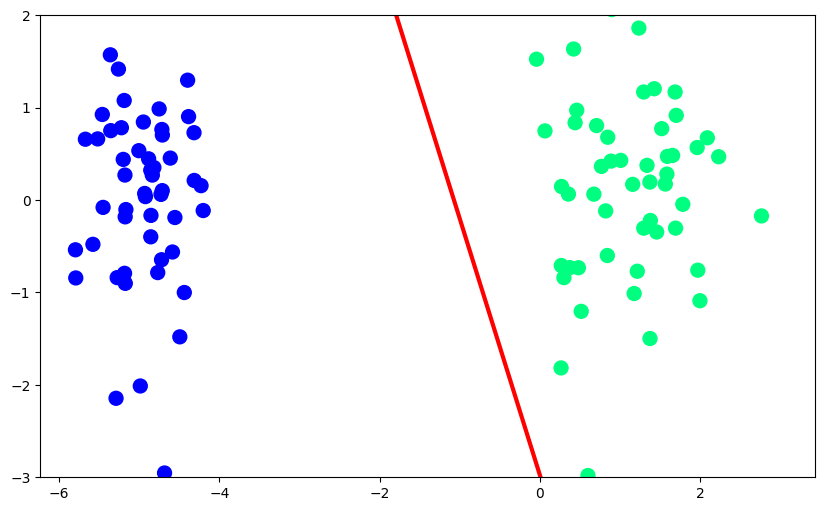

In [83]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)

## Scikit_Learn Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,Y)

LogisticRegression()

In [85]:
lor.coef_

array([[1.77298737, 0.0122258 ]])

In [86]:
lor.intercept_[0]

3.5486195228203568

In [87]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_[0]/lor.coef_[0][1])

In [88]:
m

-145.0201742684262

In [89]:
b

-290.25667676816187

In [90]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

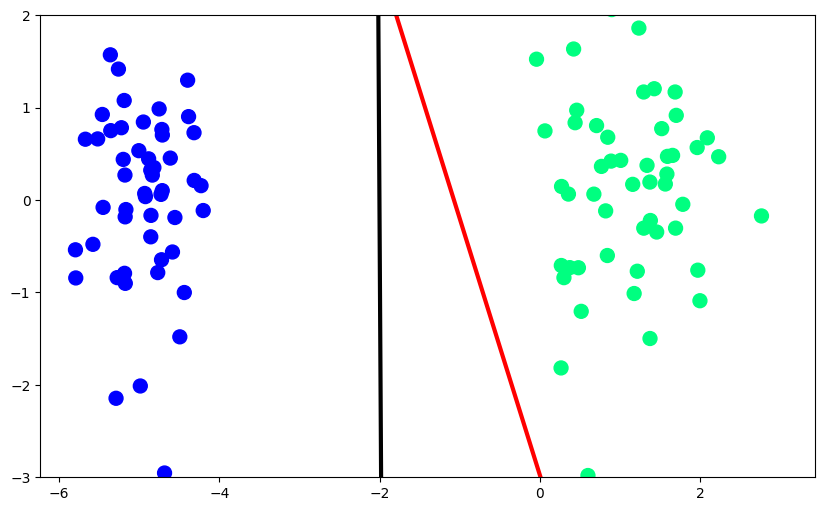

In [91]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)

## Note:
    1. Logistic Regression by Scikit learn Perform better, when changed the class sep with different value.
    2. Scikit Learn Logistic Regression distribute data Symetrically.

## Sigmoid Implementation for Preceptron Model

In [92]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [93]:
def perceptron(X,Y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(Y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [94]:
intercept_,coef_ = perceptron(X,Y)

In [95]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [96]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

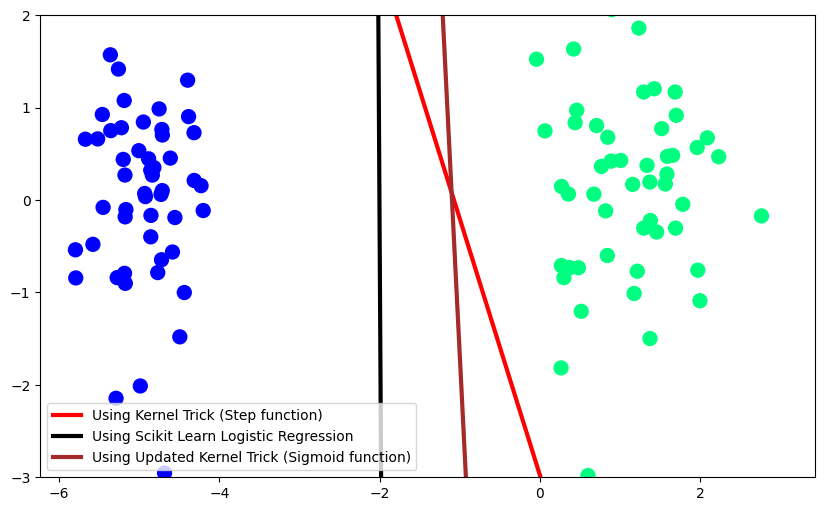

In [102]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='Using Kernel Trick (Step function)')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label = 'Using Scikit Learn Logistic Regression')
plt.plot(x_input2,y_input2,color='brown',linewidth=3,label='Using Updated Kernel Trick (Sigmoid function)')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend(loc='best')
plt.show()
